# 1. Importing Necessary Libraries and Packages

In [ ]:
!pip install nltk
!pip install wordcloud
!pip install textblob

In [2]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Libraries for Sentiment Analysis

In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

## To Avoid Warnings

In [5]:
import warnings
warnings.filterwarnings('ignore')

# 2. Loading Datasets

In [6]:
Trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv',lineterminator='\n')
Biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv',lineterminator='\n')

In [7]:
print(f"Trump Data_Shape {Trump.shape}")
print(f"Biden Data_Shape {Biden.shape}")

Trump Data_Shape (970919, 21)
Biden Data_Shape (776886, 21)


## Display all Column Names

In [ ]:
Trump.columns

In [ ]:
Biden.columns

## Conclusion:
#### Biden and Trump has same Column Names

## Getting Trump Dataset Information

In [ ]:
Trump.info()

## Getting Biden Dataset Information

In [ ]:
Biden.info()

# 3. Data Preprocessing

In [8]:
# Creating a New column Candidate in Trump dataset which all values are trump
Trump['candidate'] = 'trump'

In [ ]:
Trump.columns

In [9]:
# Creating a New column Candidate in Biden dataset which all values are biden
Biden['candidate'] = 'biden'

In [ ]:
Biden.columns

## Concatination

In [10]:
df = pd.concat([Trump,Biden],axis = 0)  # axis = 0 represent row wise concatenation which is bidefault by the way

In [11]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,trump
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,trump
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,trump
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,trump
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,trump


In [12]:
print(f"New Dataset Shape: {df.shape}")

New Dataset Shape: (1747805, 22)


## Data Cleaning

In [ ]:
# Counting Null Values in Each Columns
df.isnull().sum()

In [ ]:
df.isna().sum()

In [ ]:
df = df.dropna(axis=0, how='any', subset=['source','user_name'])
df.isnull().sum()

In [13]:
# Dropping Missing Values
df.dropna(inplace = True)

In [14]:
# Counting missing Values if exists after cleaning
df.isnull().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_screen_name        0
user_description        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
collected_at            0
candidate               0
dtype: int64

In [ ]:
df.shape

In [ ]:
df.duplicated().sum()

## Country Rename

In [15]:
df['country'] =df['country'].replace({'United States of America':'USA',
                       'United Kingdom':'UK',
                       'The Netherlands':'Netherlands',
                       'United Arab Emirates':'UAE'})

## Checking the country from where most of the tweets came

In [16]:
df['country'].value_counts()

country
USA                    182382
UK                      31869
India                   20931
France                  19996
Germany                 18534
Canada                  16250
Netherlands              8491
Australia                8330
Spain                    5254
Brazil                   4211
Pakistan                 3704
Italy                    2966
Ireland                  2587
Bangladesh               2036
Mexico                   1972
Belgium                  1962
Nigeria                  1848
South Africa             1648
UAE                      1521
Switzerland              1494
Peru                     1031
Lebanon                  1002
Argentina                 872
Ecuador                   824
Colombia                  565
Honduras                  508
Venezuela                 431
New Zealand               384
Poland                    340
Uruguay                   237
Lithuania                 198
Bolivia                   194
El Salvador               171
Om

# 4.Exploratory Data Analysis

## Tweets for Candidates

In [17]:
tweet_count = df.groupby('candidate')['tweet'].count().reset_index()
tweet_count

,candidate,tweet
0,biden,155948
1,trump,189276


In [ ]:
pip install --upgrade plotly

In [18]:
fig =px.bar(tweet_count,
            x='candidate',
            y='tweet',
            color = 'candidate',
            title = 'Tweet by Candidates',
            labels = {'candidate': 'Candidates','tweet': 'No of Tweets'},
            color_discrete_map = {'trump':'skyblue','biden':'Pink'},
            width = 800,
            height = 500)
fig.show()

## Comparision by Likes

In [19]:
like_count = df.groupby('candidate')['likes'].sum().reset_index()
like_count

,candidate,likes
0,biden,2736567.0
1,trump,2267712.0


In [20]:
fig = px.bar(like_count,x='candidate',y='likes',
            title='Comparision of Likes',
            labels={'candidate':'Candidate','likes':'No of Likes'},
            color = 'candidate',
            color_discrete_map = {'trump':'Green','biden':'Blue'},
            width=800,
            height=500)
fig.show()

## Top 5 Country-wise tweets Counts

In [21]:
top5countries = df.groupby('country')['tweet'].count().reset_index().head(5).sort_values(by ='tweet',ascending=False)
top5countries

,country,tweet
1,Australia,8330
2,Bangladesh,2036
3,Belgium,1962
0,Argentina,872
4,Bolivia,194


In [22]:
fig = px.bar(top5countries,
            x='country',
            y='tweet',
            color='country',
            title='Top 10 Countries by Tweets',
            labels={'country':'Country','tweet':'No of Tweets'},
            height = 500,
            width = 800)
fig.show()

## Tweet Counts for Each Candidate in the Top 5 Countries

In [23]:
tweet_df = df.groupby(['country', 'candidate'])['tweet'].count().reset_index()
tweet_df

,country,candidate,tweet
0,Argentina,biden,459
1,Argentina,trump,413
2,Australia,biden,3181
3,Australia,trump,5149
4,Bangladesh,biden,664
...,...,...,...
96,USA,trump,96622
97,Uruguay,biden,102
98,Uruguay,trump,135
99,Venezuela,biden,196


In [24]:
tweeters = tweet_df[tweet_df['country'].isin(top5countries.country)].sort_values(by='tweet',ascending = False)
tweeters

,country,candidate,tweet
3,Australia,trump,5149
2,Australia,biden,3181
5,Bangladesh,trump,1372
7,Belgium,trump,1114
6,Belgium,biden,848
4,Bangladesh,biden,664
0,Argentina,biden,459
1,Argentina,trump,413
9,Bolivia,trump,131
8,Bolivia,biden,63


In [25]:
fig = px.bar(
    tweeters,
    x='country',
    y='tweet',
    color='candidate',
    color_discrete_map = {'biden':'Pink','trump':'Skyblue'},
    labels={'country': 'Country',
            'tweet': 'Number of Tweets',
            'candidate': 'Candidate'},
    title='Tweet Counts for Each Candidate in the Top 5 Countries',
    barmode='group',
    height = 500,
    width = 800
)

fig.show()

# 5. Sentiment Analysis

In [26]:
def clean(text):
    text = re.sub(r'https?://\s+|www\.\s+', '', str(text))
    text = text.lower()
    text = re.sub(r'[^a-z]',' ',text)
    text = text.split()

    lm = WordNetLemmatizer()
    text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english')) ]
    text = ' '.join(word for word in text)
    return text

## Polarity

In [28]:
def polarity(text):
    return TextBlob(text).sentiment.polarity

## Subjectivity

In [29]:
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## Analysis

In [30]:
def analysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Tweet sentiment Analysis in USA

## Trump Tweets

In [31]:
trump_tweets = df[(df['candidate'] == 'trump') & (df['country'] == 'USA')]
trump_tweets['tweet'].head()

2     #Trump: As a student I used to hear for years,...
4     You get a tie! And you get a tie! #Trump ‘s ra...
11    In 2020, #NYPost is being #censorship #CENSORE...
12    #Trump #PresidentTrump #Trump2020LandslideVict...
22    #Trump: Nobody likes to tell you this, but som...
Name: tweet, dtype: object

## Biden Tweets

In [44]:
biden_tweets = df[(df['candidate'] == 'biden') & (df['country'] == 'USA')]
biden_tweets['tweet'].head()

6     In 2020, #NYPost is being #censorship #CENSORE...
17    Comments on this? "Do Democrats Understand how...
25    @RealJamesWoods #BidenCrimeFamily #JoeBiden #H...
29    Come on @ABC PLEASE DO THE RIGHT THING. Move t...
34    #realDonaldTrump addresses #JoeBiden and #Hunt...
Name: tweet, dtype: object

## Now Apply the Clean Function to Clean the Text

## Clean Tweets of Trump

In [32]:
trump_tweets['clean_tweet'] = trump_tweets['tweet'].apply(clean)
trump_tweets[['tweet', 'clean_tweet']].head()

,tweet,clean_tweet
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa http co jjaluumh
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...


## Clean Tweets of Biden

In [45]:
biden_tweets['clean_tweet'] = biden_tweets['tweet'].apply(clean)
biden_tweets[['tweet','clean_tweet']].head()

,tweet,clean_tweet
6,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...
17,"Comments on this? ""Do Democrats Understand how...",comment democrat understand ruthless china htt...
25,@RealJamesWoods #BidenCrimeFamily #JoeBiden #H...,realjameswoods bidencrimefamily joebiden hunte...
29,Come on @ABC PLEASE DO THE RIGHT THING. Move t...,come abc please right thing move biden town ha...
34,#realDonaldTrump addresses #JoeBiden and #Hunt...,realdonaldtrump address joebiden hunterbiden c...


## Subjectivity of Trump

In [48]:
trump_tweets['subjectivity'] = trump_tweets['clean_tweet'].apply(subjectivity)
trump_tweets['subjectivity'].head()

2     0.333333
4     0.000000
11    0.678571
12    0.750000
22    0.595238
Name: subjectivity, dtype: float64

## Subjectivity of Trump

In [49]:
biden_tweets['subjectivity'] = biden_tweets['clean_tweet'].apply(subjectivity)
biden_tweets['subjectivity'].value_counts()

subjectivity
0.000000    35772
1.000000     3306
0.500000     3258
0.400000     2861
0.900000     1565
            ...  
0.390970        1
0.735556        1
0.435873        1
0.894444        1
0.652381        1
Name: count, Length: 3588, dtype: int64

## Polarity of Trump

In [50]:
trump_tweets['polarity'] = trump_tweets['clean_tweet'].apply(polarity)
trump_tweets['polarity'].value_counts()

polarity
 0.000000    42463
 0.500000     2438
 0.800000     1951
 0.200000     1826
 0.250000     1571
             ...  
 0.117045        1
-0.092857        1
-0.516667        1
-0.338889        1
-0.229167        1
Name: count, Length: 5267, dtype: int64

## Polarity of Biden

In [51]:
biden_tweets['polarity'] = biden_tweets['clean_tweet'].apply(polarity)
biden_tweets['polarity'].head()

6    -0.148810
17   -1.000000
25    0.000000
29    0.078571
34    0.000000
Name: polarity, dtype: float64

## Sentiment Analysis of Biden

In [53]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(analysis)
trump_tweets['analysis'].value_counts()

analysis
Neutral     42463
Positive    32478
Negative    21681
Name: count, dtype: int64

## Sentiment Analysis of Biden

In [55]:
biden_tweets['analysis'] = biden_tweets['polarity'].apply(analysis)
biden_tweets['analysis'].value_counts()

analysis
Neutral     40121
Positive    32521
Negative    13118
Name: count, dtype: int64

In [57]:
print(f"After Cleaning Trump Data_shape: {trump_tweets.shape}")
print(f"After Cleaning Biden Data_shape: {biden_tweets.shape}")

After Cleaning Trump Data_shape: (96622, 26)
After Cleaning Biden Data_shape: (85760, 26)


In [60]:
trump_sentiment = trump_tweets.groupby('analysis')['tweet'].count().reset_index()
biden_sentiment = biden_tweets.groupby('analysis')['tweet'].count().reset_index()
print(f"Trump Senriment Chart:\n\n {trump_sentiment}")
print()
print(f"Biden Sentiment Chart:\n\n {biden_sentiment}")

Trump Senriment Chart:

    analysis  tweet
0  Negative  21681
1   Neutral  42463
2  Positive  32478

Biden Sentiment Chart:

    analysis  tweet
0  Negative  13118
1   Neutral  40121
2  Positive  32521


## Sentiment Analysis Chart of Trump

In [41]:
fig = px.bar(trump_sentiment,
            x = 'analysis',
            y = 'tweet',
            color = 'analysis',
            color_discrete_map = {'Positive':'#8BC34A',#light green
                                  'Negative':'#E57373',#light red
                                  'Neutral':'#64B5F6'#light blue
                                 },
            title = 'Sentiment Analysis of Trump using Tweeter Trends',
            height = 500,
            width = 800)
fig.show()

## Sentiment Analysis Chart of Biden

In [61]:
fig = px.bar(
    biden_sentiment,
    x = 'analysis',
    y = 'tweet',
    color = 'analysis',
    color_discrete_map = {'Positive':'#8BC34A',#light green
                                  'Negative':'#E57373',#light red
                                  'Neutral':'#64B5F6'#light blue
                         },
    title = 'Sentiment Analysis of Biden using Tweeter Trends',
    height = 500,
    width = 800)

fig.show()

In [62]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Create subplot figure
fig = make_subplots(rows=1, cols=2, 
                    subplot_titles=('Sentiment Analysis of Trump', 
                                    'Sentiment Analysis of Biden'))

# Add Trump sentiment bar plot
fig.add_trace(
    go.Bar(
        x=trump_sentiment['analysis'],
        y=trump_sentiment['tweet'],
        marker_color=[
            '#8BC34A' if analysis == 'Positive' else 
            '#E57373' if analysis == 'Negative' else 
            '#64B5F6' for analysis in trump_sentiment['analysis']
        ],
        name='Trump Sentiment'
    ),
    row=1, col=1
)

# Add Biden sentiment bar plot
fig.add_trace(
    go.Bar(
        x=biden_sentiment['analysis'],
        y=biden_sentiment['tweet'],
        marker_color=[
            '#8BC34A' if analysis == 'Positive' else 
            '#E57373' if analysis == 'Negative' else 
            '#64B5F6' for analysis in biden_sentiment['analysis']
        ],
        name='Biden Sentiment'
    ),
    row=1, col=2
)

# Update layout
fig.update_layout(
    height=500, 
    width=1600,  # Increased width to accommodate two plots
    title_text='Sentiment Analysis Comparison',
    showlegend=True
)

# Show the figure
fig.show()

## WordCloud Function

In [64]:
def word_cloud(word_list):
    all_words = ' '.join(word_list)
    
    wordcloud = WordCloud(background_color = 'white',
                         stopwords = set(STOPWORDS),
                          width = 800,
                          height = 500,
                          max_font_size = 200,
                          max_words = 100,
                          colormap = 'viridis' 
                         ).generate(all_words)
    
    plt.figure(figsize = (12,10))
    plt.axis('off')
    plt.imshow(wordcloud)

## Word Cloud of Trump Tweets

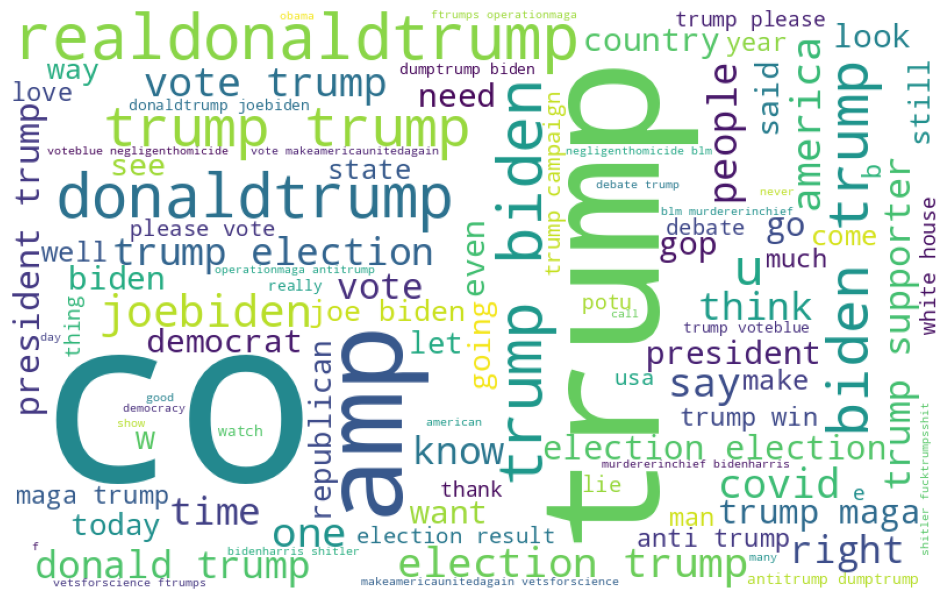

In [65]:
word_cloud(trump_tweets['clean_tweet'])

## Word Cloud of Biden Tweets

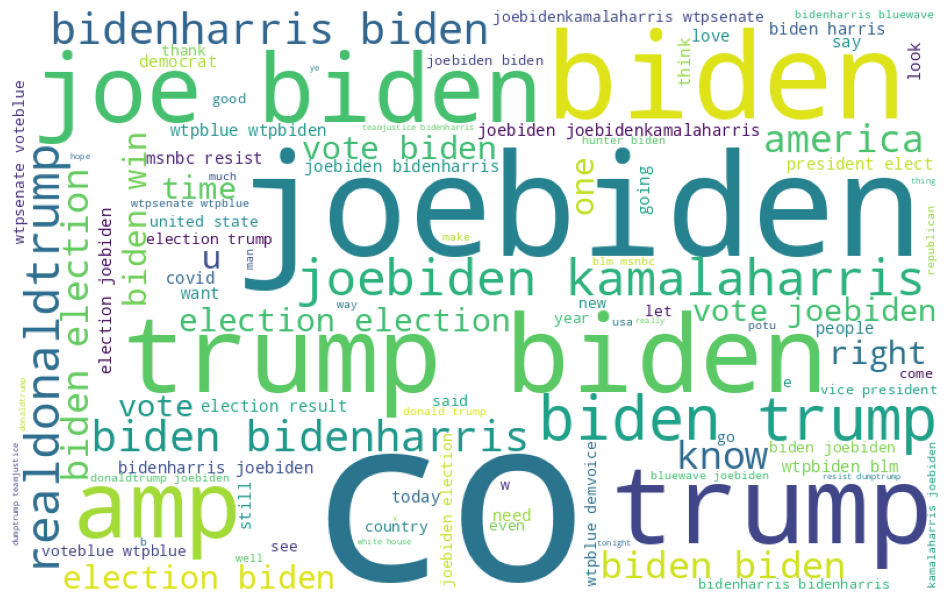

In [66]:
word_cloud(biden_tweets['clean_tweet'])

# **Conclusion:**


let's analyze what each sentiment's percentage represents and its implications on the result.

**Positive Sentiment:** Positive tweets about Biden outnumber positive tweets about Trump: Biden's tweets have a higher percentage of positive feelings (36.43%) than Trump's ( 33.99%). This shows that Twitter users are responding more favorably to Biden.

**Neutral Sentiment:** Trump receives more neutral sentiments: In contrast, Trump receives slightly more neutral sentiments (43.22%) in comparison to Biden (46.83%) in his tweets. This may indicate that Trump's tweets are more likely to be seen as neutral or impersonal, leading to a higher neutral sentiment rate.

**Negative Sentiment:** Trump gets more unfavorable reactions: While both candidates have received criticism, Trump's tweets have a greater percentage of unfavorable reactions (22.78%) than Biden's (16.79%). This implies that there may have been more opposition to Trump's tweets on Twitter.

With respect to the U.S. voters, it was highlighted a lot of times that Trump was the most talked about and tweeted about among people however, Trump has received more negative comments as compared to Joe Biden. As a result, Joe Biden won the 2020 elections which is a proven fact. However, overall, the competition was close as shown by the data.